In [1]:
#imort import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv("dataset/Placement_Data_Full_Class.csv")
#see the 5 first data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
#set the sl_no as a row no
df.set_index('sl_no',inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#check datatype or null 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [5]:
#see some statics data
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Questions

   1. Which factor influenced a candidate in getting placed?
   2. Does percentage matters for one to get placed?
   3. Which degree specialization is much demanded by corporate?
   4. Play with the data conducting all statistical tests.


# clean data

In [6]:
# check null values in df
df.isnull().sum()
#only salary have a some null values
# so we delete or replace this with some value like mean, median or 0.

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
#check number of rows and columns
print(df.shape[0]) #no of rows
print(df.shape[1]) #no of columns

215
14


In [8]:
#check which is best value in place of salary null
print(df["salary"].mean())
print(df["salary"].median())
print(df["salary"].mode())
print(df["salary"].max())
print(df["salary"].min())
# i choose mean value

288655.4054054054
265000.0
0    300000.0
dtype: float64
940000.0
200000.0


In [9]:
#fill salary null value with mode because mode 
df["salary"]=df["salary"].fillna(df["salary"].mean())

In [10]:
#check datatypes
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [11]:
# we convert object type data into numerical datatype
# many way to convert datatype 
#1st way

df['gender']=df['gender'].astype('category')
df['status']=df['status'].astype('category')
df['workex']=df['workex'].astype('category')
df['hsc_b']=df['hsc_b'].astype('category')
df['ssc_b']=df['ssc_b'].astype('category')

#use diffrent types of encoding

In [12]:
#check how many unique data in these dataframe

print(df['gender'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['hsc_b'].unique())
print(df['ssc_b'].unique())

[M, F]
Categories (2, object): [M, F]
[Placed, Not Placed]
Categories (2, object): [Placed, Not Placed]
[No, Yes]
Categories (2, object): [No, Yes]
[Others, Central]
Categories (2, object): [Others, Central]
[Others, Central]
Categories (2, object): [Others, Central]


In [13]:

df["gender"].replace(["F","M"],[0,1],inplace=True)
#df['gender'] = df['gender'].apply({"M":1, "F":0}.get)

df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)


In [14]:

#another way of of replace one-by-one
df['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
df['workex'].replace(to_replace ="No", value =0,inplace=True)

In [15]:
df["status"].dtype

dtype('int64')

In [16]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.000000
2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.000000
3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.000000
4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,288655.405405
5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.000000


In [17]:
#create a new dataframe of only numerical values
numerical_df=df.select_dtypes(["float64","int64"])

 #  Visualizing the data

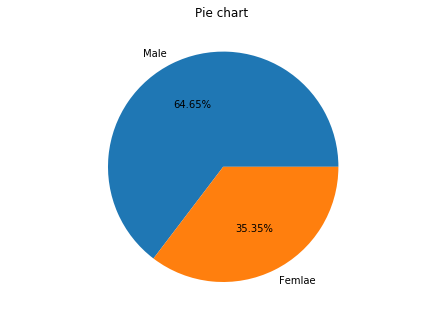

In [18]:
# show the percentage of male or female
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Male','Femlae']
students = [139,76]
ax.pie(students, labels = langs,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

1    148
0     67
Name: status, dtype: int64


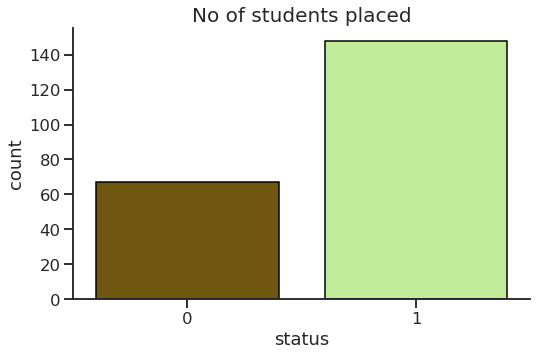

In [19]:
#show the no. of student how placed or not placed.
col_list = ["shit","pistachio"]
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)
sns.set(rc={"figure.figsize": (10,6)},
 palette = sns.set_palette(col_list_palette),
 context="talk",
 style="ticks")
# How many smokers are in this study?
sns.catplot(x = 'status', data=numerical_df, kind='count',height=5,aspect=1.5, edgecolor="black")
plt.title('No of students placed', fontsize = 20)
print(numerical_df['status'].value_counts())


scc_p mean = 67.3033953488372
hsc_p mean = 66.33316279069766
mba_p mean = 62.278186046511586
degree_p mean = 66.37018604651163


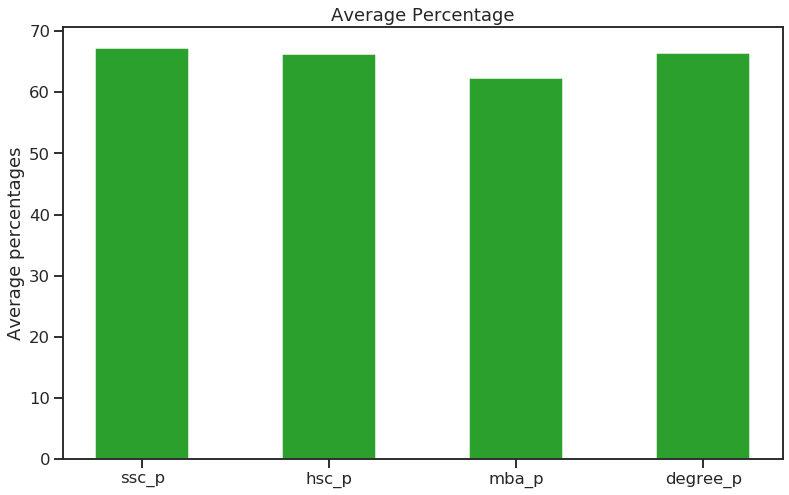

In [20]:
#average percentage of all education qualification
values = [(numerical_df['ssc_p'].mean()),(numerical_df['hsc_p'].mean()),(numerical_df['mba_p'].mean()),(numerical_df['degree_p'].mean())]
print('scc_p mean = ' +str(numerical_df['ssc_p'].mean()))
print('hsc_p mean = ' +str(numerical_df['hsc_p'].mean()))
print('mba_p mean = ' +str(numerical_df['mba_p'].mean()))
print('degree_p mean = ' +str(numerical_df['degree_p'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

Questions

   1. Which factor influenced a candidate in getting placed?
 


In [21]:
#show the relation between diffrent qualification placement status usinng correlation.

print('ssc_p to placement ', round(numerical_df['status'].corr(numerical_df['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(numerical_df['status'].corr(numerical_df['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(numerical_df['status'].corr(numerical_df['mba_p'])*100,1),'%')
print('degree_p to placement ', round(numerical_df['status'].corr(numerical_df['degree_p'])*100,1),'%')
print('etest_p to placement ', round(numerical_df['status'].corr(numerical_df['etest_p'])*100,1),'%')

print('workexp to placement ', round(numerical_df['status'].corr(numerical_df['workex'])*100,1),'%')

ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %
workexp to placement  27.6 %


Answer 
    1. ssc_p feature data factor influenced a candidate in getting placed.

when we see the correlation between features and placement then it show me the ssc_p data to more correlated to placcement.

I know it is some tricky to say that senior secondary(ssc_p)percentage is not so much help in real world placement.

Question 
   2. Does percentage matters for one to get placed?
   
Answer 
    
    
    After see the correlation between features and placement the we definatly say the 
       percentage matters for get a placed

In [22]:
df1 = pd.read_csv('dataset/Placement_Data_Full_Class.csv')

In [23]:
df_grade = df1.groupby(['status']).mean()[['hsc_p', 'degree_p', 'mba_p']].reset_index()

In [24]:
#Student Grades and Campus Placement

import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline

trace1 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']=='Not Placed'].drop('status', axis=1).values[0],
    name = 'Not Placed'
)

trace2 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']=='Placed'].drop('status', axis=1).values[0],
    name = 'Placed'
)

data = [trace1, trace2]

layout = go.Layout(
    yaxis = dict(title = 'Grade'),
    xaxis = dict(title = 'Stage'),
    title = 'Student Grades and Campus Placement')

fig = go.Figure(data=data, layout=layout)
fig.show()

Question 
   3. Which degree specialization is much demanded by corporate?
    

specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


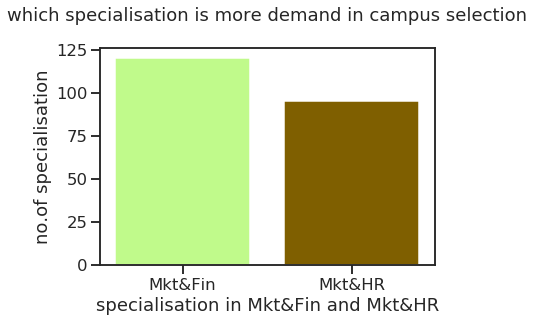

In [25]:
# which specialisation is more demand in campus selection

plt.bar([1],height=len(df[df["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(df[df["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&Fin "+ str(len(df[df["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(df[df["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

# plt.xticks(["marketing","finance"])
# plt.show()
#plt.bar([df["specialisation"]=="Mkt&HR",df["specialisation"]=="Mkt&HR"],height=250)

Question
 4. Play with the data conducting all statistical tests.


Train the data and create a model to predict the placed or not.

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
len(df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']])

215

In [28]:
x_train , x_test , y_train , y_test = train_test_split(df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']],df.status,test_size=0.2)

In [29]:
x_train.head()

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p
sl_no,,,,,,
189,61.8,47.0,54.38,0,57.0,56.13
115,65.0,68.0,69.00,0,53.7,55.01
70,73.0,73.0,66.00,1,70.0,68.07
99,69.0,73.0,65.00,0,70.0,57.31
78,64.0,80.0,65.00,1,69.0,57.65


In [30]:
# create a logisti
model=LogisticRegression()
model.fit(x_train,y_train)

/home/rahish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
prediction=model.predict(x_test)

In [32]:
accuracy_score(y_test,prediction)

0.8604651162790697

In [33]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 105 decision trees
rf = RandomForestRegressor(n_estimators = 105, random_state = 41)
# Train the model on training data
rf.fit(x_test, y_test);

In [34]:
rf.score(x_test,y_test)

0.9277017079409762